## Hough Circle Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

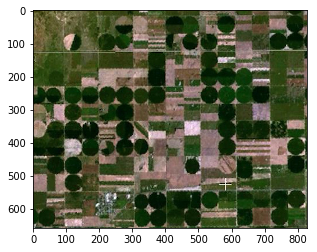

In [2]:
# Read in the image
image = cv2.imread('images/round_farms.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

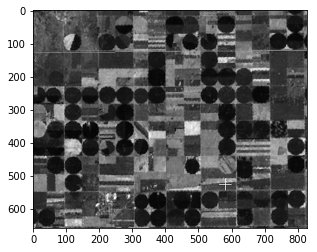

In [3]:
# Gray and blur
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)

plt.imshow(gray_blur, cmap='gray')


### HoughCircles function

`HoughCircles` takes in a few things as its arguments:
* an input image, detection method (Hough gradient), resolution factor between the detection and image (1),
* minDist - the minimum distance between circles
* param1 - the higher value for performing Canny edge detection
* param2 - threshold for circle detection, a smaller value --> more circles will be detected
* min/max radius for detected circles

The variable you should change will be the last two: min/max radius for detected circles. Take a look at the image above and estimate how many pixels the average circle is in diameter; use this estimate to provide values for min/max arguments. You may also want to see what happens if you change minDist.

Circles shape:  (1, 173, 3)


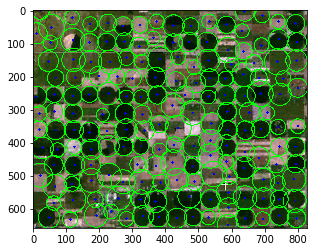

In [4]:
# for drawing circles on
circles_im = np.copy(image)

## TODO: use HoughCircles to detect circles
# right now there are too many, large circles being detected
# try changing the value of maxRadius, minRadius, and minDist
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 
                           minDist=45,
                           param1=70,
                           param2=11,
                           minRadius=20,
                           maxRadius=40)

# convert circles into expected type
circles = np.uint16(np.around(circles))
# draw each one
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(circles_im)

print('Circles shape: ', circles.shape)
    